EDA de Steam

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import warnings 

In [3]:
warnings.filterwarnings('ignore')

Cargar los datos de los parquet

In [14]:
steam_games = pd.read_parquet('steam_games.parquet')
steam_reviews = pd.read_parquet('./steam_reviews.parquet')
steam_items = pd.read_parquet('./steam_items.parquet')

In [15]:
df_merge = pd.merge(steam_games, steam_reviews, on='item_id')

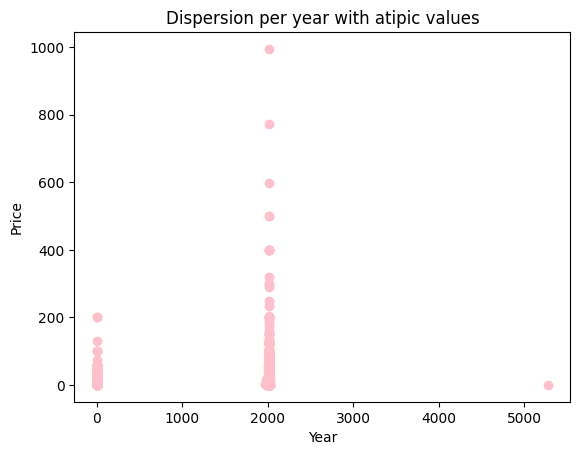

In [16]:
plt.scatter(steam_games['año'], steam_games['price'], color='pink')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Dispersion per year with atipic values')
plt.show()

In [17]:
steam_games['año'].describe()

count    32131.000000
mean      1878.990103
std        505.651940
min          0.000000
25%       2014.000000
50%       2016.000000
75%       2017.000000
max       5275.000000
Name: año, dtype: float64

In [18]:
Q1 = steam_games['price'].quantile(0.25)
Q3 = steam_games['price'].quantile(0.75)


rango = Q3 - Q1

lower_bound = Q1 - 1.5 * rango
upper_bound = Q3 + 1.5 * rango



In [19]:
df_outliers = steam_games[(steam_games['price'] >= lower_bound) & (steam_games['price'] <= upper_bound)]

In [20]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30258 entries, 0 to 32130
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   genres                     30258 non-null  object 
 1   app_name                   30258 non-null  object 
 2   tags                       30258 non-null  object 
 3   price                      30258 non-null  float64
 4   item_id                    30258 non-null  int64  
 5   developer                  30258 non-null  object 
 6   año                        30258 non-null  int64  
 7   0                          30258 non-null  int64  
 8   Accounting                 30258 non-null  int64  
 9   Action                     30258 non-null  int64  
 10  Adventure                  30258 non-null  int64  
 11  Animation &amp; Modeling   30258 non-null  int64  
 12  Audio Production           30258 non-null  int64  
 13  Casual                     30258 non-null  int64  


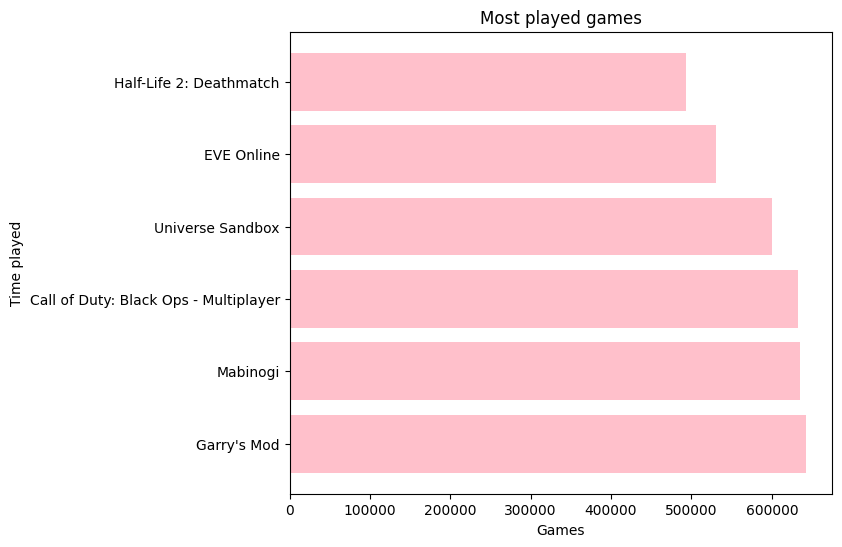

In [21]:
most_played = steam_items.sort_values(by= 'playtime_forever', ascending=False).head(10)

plt.figure(figsize=(7, 6))

plt.barh(most_played['item_name'], most_played['playtime_forever'], color='pink')
plt.xlabel('Games')
plt.ylabel('Time played')
plt.title('Most played games')

#plt.gca().invert_yaxis()

plt.show()

In [22]:
steam_games['genres']

0            Action, Casual, Indie, Simulation, Strategy
1                     Free to Play, Indie, RPG, Strategy
2        Casual, Free to Play, Indie, Simulation, Sports
3                              Action, Adventure, Casual
4                                                      0
                              ...                       
32126                Casual, Indie, Simulation, Strategy
32127                            Casual, Indie, Strategy
32128                          Indie, Racing, Simulation
32129                                      Casual, Indie
32130                                                  0
Name: genres, Length: 32131, dtype: object

In [23]:
genres = list(steam_games.drop(columns=['app_name','price','item_id','developer','Accounting','año']).columns)

In [24]:
def contador(df, lista):
    aux = []
    for i in lista:
        aux.append((i, round((len(df.loc[df[i] == 1])), 2)))
    aux = dict(aux)
    counter_list = Counter(aux)
    return counter_list

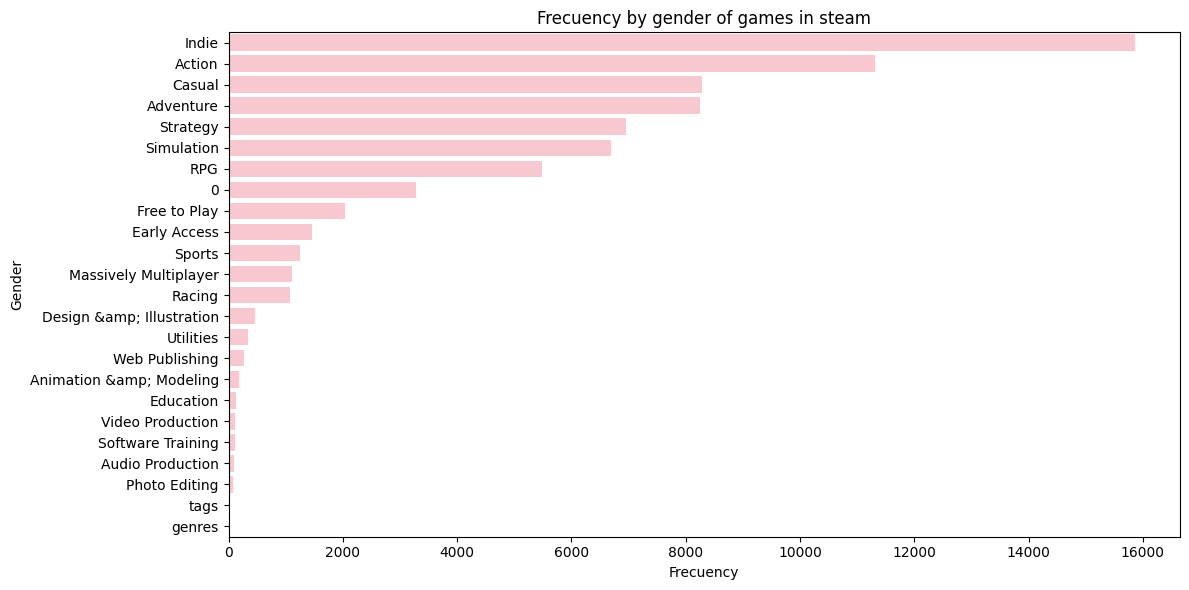

In [25]:
counter_list2 = contador(steam_games, genres)
aux_data = counter_list2
aux_data = pd.DataFrame.from_dict(aux_data, orient='index', columns=['Frecuencia'])
aux_data = aux_data.sort_values(by= 'Frecuencia', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Frecuencia', y=aux_data.index, data = aux_data, color='pink')

plt.xlabel('Frecuency')
plt.ylabel('Gender')
plt.title('Frecuency by gender of games in steam')

plt.tight_layout()
plt.show()

Cargar los datos de imtems

In [26]:
steam_items = pd.read_parquet('steam_items.parquet')

In [27]:
steam_items.head(5)

,user_id,items_count,steam_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,10,Counter-Strike,6.0,0.0
1,76561197970982479,277,76561197970982479,20,Team Fortress Classic,0.0,0.0
2,76561197970982479,277,76561197970982479,30,Day of Defeat,7.0,0.0
3,76561197970982479,277,76561197970982479,40,Deathmatch Classic,0.0,0.0
4,76561197970982479,277,76561197970982479,50,Half-Life: Opposing Force,0.0,0.0


In [28]:
steam_items['playtime_forever'].describe()

count    5.153209e+06
mean     9.914951e+02
std      5.418204e+03
min      0.000000e+00
25%      0.000000e+00
50%      3.400000e+01
75%      3.550000e+02
max      6.427730e+05
Name: playtime_forever, dtype: float64

Se buscan valores atipicos en playtime_forever

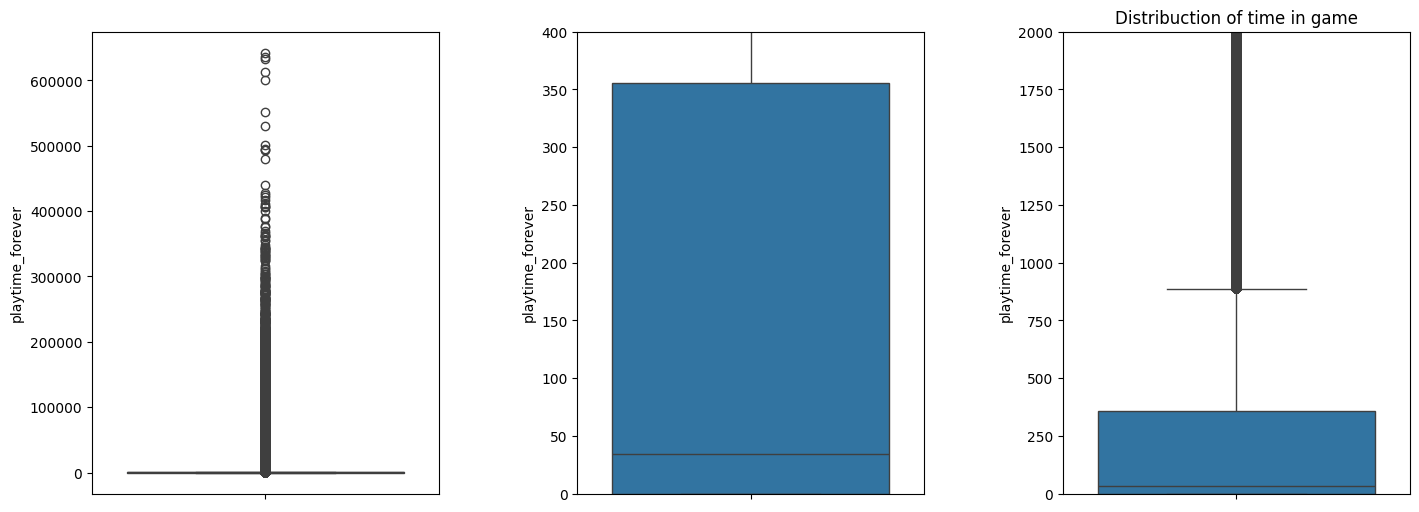

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(17, 6))
sns.boxplot(data=steam_items, y='playtime_forever', ax=ax[0])
sns.boxplot(data=steam_items, y='playtime_forever', ax=ax[1])
sns.boxplot(data=steam_items, y='playtime_forever', ax=ax[2])
ax[1].set_ylim(0, 400)
ax[2].set_ylim(0, 2000)
plt.title('Distribuction of time in game')
plt.subplots_adjust(wspace=0.4)
plt.show()

Cargar los Datos de los reviews

In [30]:
steam_reviews = pd.read_parquet('steam_reviews.parquet')

In [31]:
steam_reviews['recommend'] = steam_reviews['recommend'].astype(int)

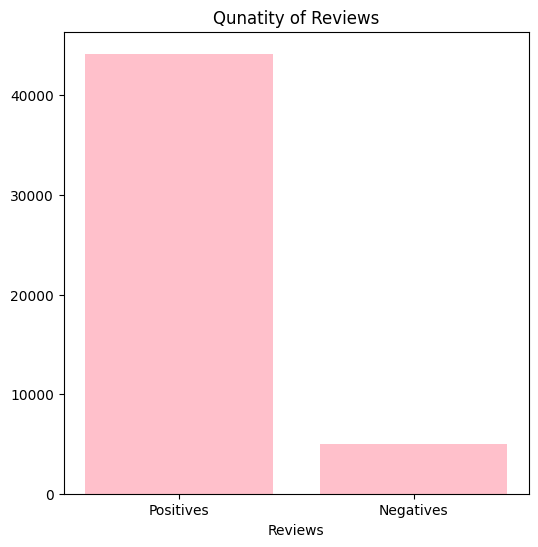

In [32]:
plt.figure(figsize=(6, 6))

positivas = len(steam_reviews[steam_reviews['recommend'] == 1])
negativas = len(steam_reviews[steam_reviews['recommend'] == 0])

plt.bar(['Positives', 'Negatives'], [positivas, negativas], color= 'pink')
plt.xlabel('Reviews')
plt.title('Qunatity of Reviews')

plt.show()

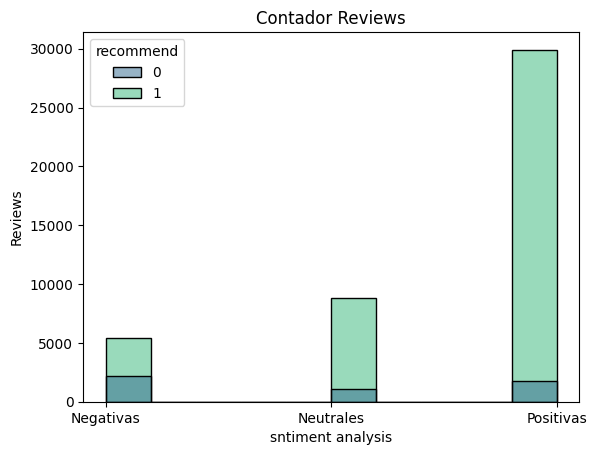

In [33]:
sns.histplot(data=steam_reviews,x='sentiment_analysis',bins=10,palette='viridis',hue='recommend')
plt.title('Contador Reviews')
plt.xticks(ticks=[0, 1, 2], labels=['Negativas', 'Neutrales', 'Positivas'])
plt.ylabel('Reviews')
plt.xlabel('sntiment analysis')
plt.show()

Grafico de Analisis de sentimiento

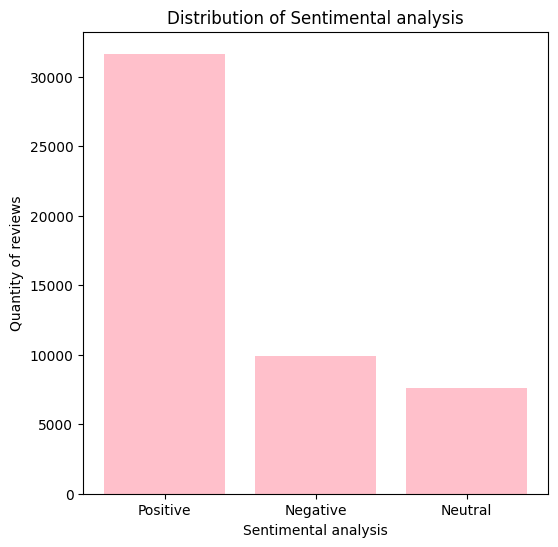

In [34]:
plt.figure(figsize=(6, 6))  # Ajusta el tamaño del gráfico.

# Contar el número de reseñas positivas, negativas y neutrales
positiva = len(steam_reviews[steam_reviews['sentiment_analysis'] == 2])
negativa = len(steam_reviews[steam_reviews['sentiment_analysis'] == 1])
neutral = len(steam_reviews[steam_reviews['sentiment_analysis'] == 0])

# Graficar los datos
plt.bar(['Positive', 'Negative', 'Neutral'], [positiva, negativa, neutral], color= 'pink')
plt.xlabel('Sentimental analysis')  # Etiqueta del eje X
plt.ylabel('Quantity of reviews')  # Etiqueta del eje Y
plt.title('Distribution of Sentimental analysis')  # Título del gráfico

# Mostrar el gráfico
plt.show()

Desarrolladores con más juegos recomendados

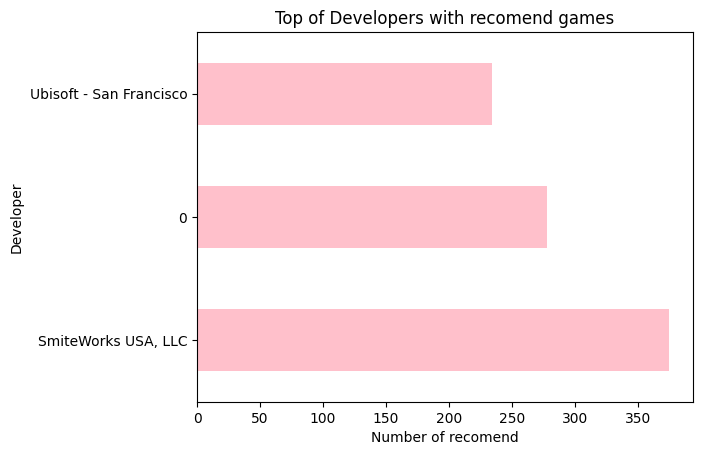

In [35]:
df_year = steam_games[(steam_games['año'] == 2017) & (steam_reviews['recommend'] == True)]

# Contar el número de juegos recomendados por desarrollador y devolver los tres primeros desarrolladores
top_desarrolladores = df_year['developer'].value_counts().head(3)

# Crear un gráfico de barras horizontales que muestre el número de juegos recomendados por desarrollador
top_desarrolladores.plot.barh(color='pink')
plt.title('Top of Developers with recomend games')
plt.xlabel('Number of recomend')
plt.ylabel('Developer')

plt.show()

3 Juegos más recomendados

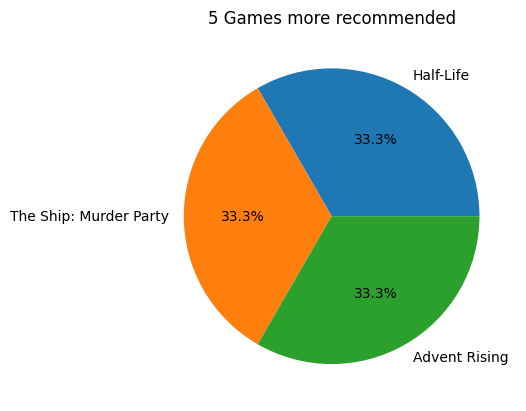

In [36]:
top_recomendados = df_merge.drop_duplicates(subset='app_name').nlargest(3, 'recommend')

plt.pie(top_recomendados['recommend'], labels=top_recomendados['app_name'], autopct='%1.1f%%')
plt.title('5 Games more recommended')
plt.show()